<a href="https://colab.research.google.com/github/YukiAoki-GU/-Mathematical_analysis_by_Python/blob/main/Python%E5%85%A5%E9%96%80%E3%81%AE%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%922.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-1. ジャンケンルールの機械学習
畳み込みニューラルネットワークの仕組みを理解するための準備を行いましょう。

まずは，ジャンケンの判定を機械学習で判断する人工ニューロンを作ってみましょう。
できるだけ簡単にするため，ジャンケンの手はパーを除いた「グー」と「チョキ」のみとし，ジャンケンに「勝つ」「それ以外」を判定することとします。入力シグナルとして「グー」を0，「チョキ」を1とし，「勝つ」と1，「それ以外」では0が出力されるものとします。

[自分の手 $x_1$, 相手の手 $x_2$]　　　→ 出力結果

= [0, 0] (グー，グー)　　　→　0

= [0, 1] (グー，チョキ)　　→　1

= [1, 0] (チョキ，グー)　　→　0

= [1, 1] (チョキ，チョキ)　→　0

つまり，[0, 1]の時だけをその他から分離することができれば良いということになります。(下図の緑線を引くことができれば良い)

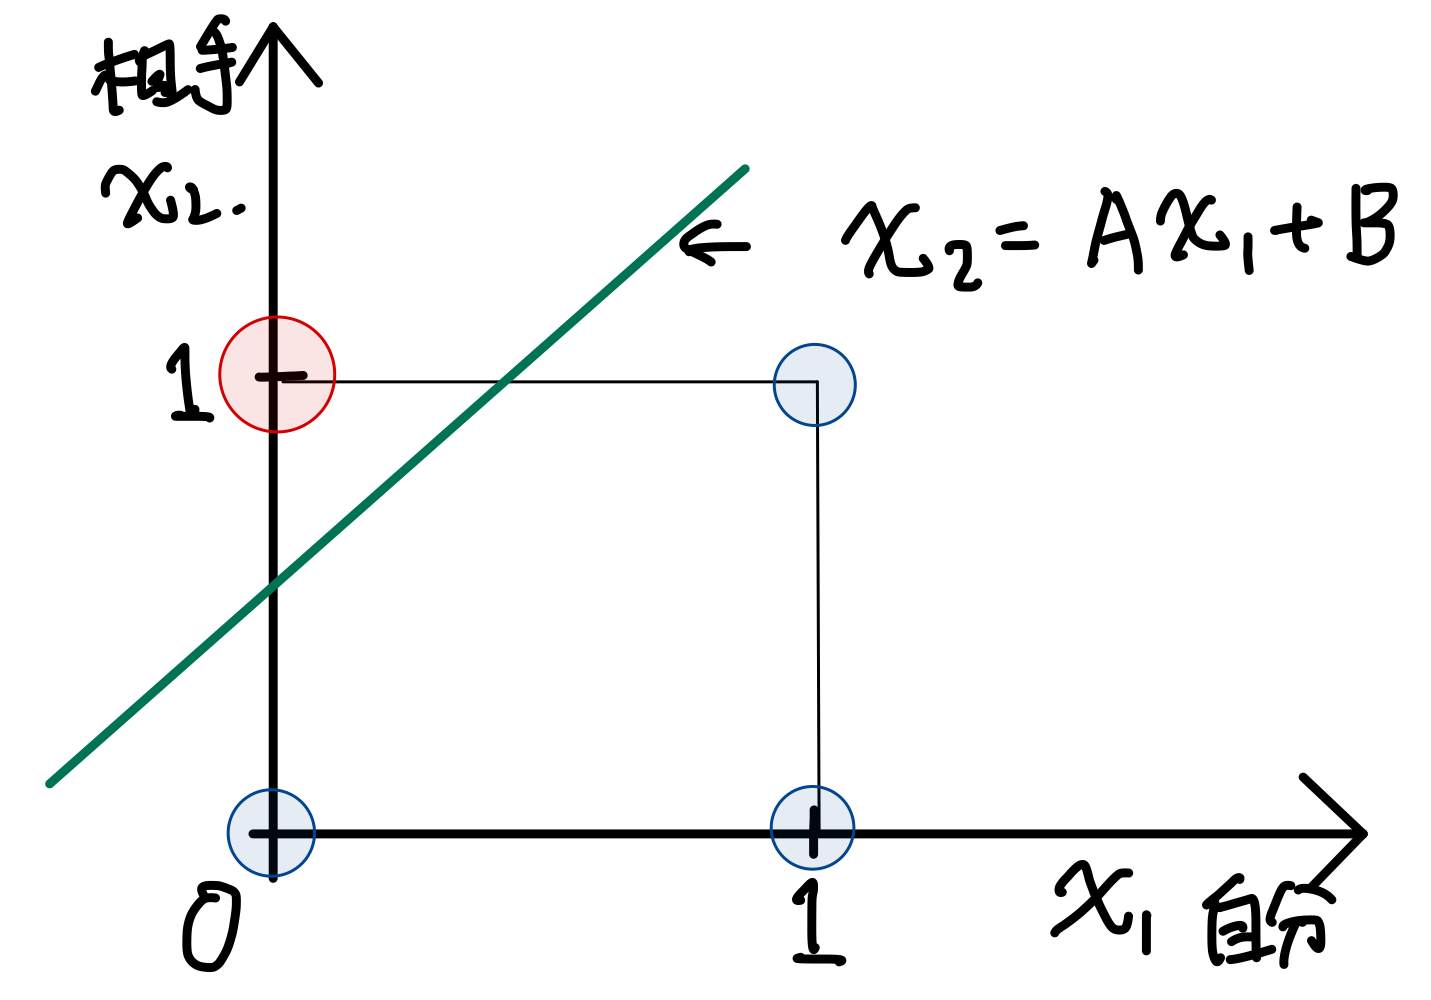

$x_2 > Ax_1 + B$ であれば1を出力

$x_2 < Ax_1 + B$ であれば0を出力

となるような$A, B$を探せば良いことになります。

例えば

$A = 0.9$，$B= 0.6$であれば分離できていますね。

このように分離できる$A，B$を学習して探すことが人工ニューロンを作るための最も単純な工程です。

# 2-2. 単純パーセプトロン
最も単純な人工ニューロンは入力シグナルに対して出力する(1を発信，「発火」と呼ぶこともある)か，出力しない(0を発信)するかです。この仕組みを有する単一の人工ニューロンを，(単純)パーセプトロンと呼びます。上記を満たすパーセプトロンを作りましょう。

In [5]:
# 訓練データと正解ラベル
import numpy as np
# 訓練データ
train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 正解ラベル
label = np.array([[0], [1], [0], [0]])

# TenforFlowのインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model = Sequential() # Sequentialオブジェクトの生成

## 出力層
model.add(
    Dense(units=1, #出力の次元
          input_dim=2, # 入力が2種の特徴
          activation='sigmoid')) # 活性化関数はシグモイド

model.compile(
    optimizer=SGD(learning_rate=0.5),  # lrをlearning_rateに変更
    loss='binary_crossentropy'        # クロスエントロピー誤差関数はバイナリ専用
)

history = model.fit(
    train,        # 訓練データ
    label,        # 正解ラベル
    epochs=100,  # 学習回数
    batch_size=4, # ミニバッチの数(4つすべてのデータを使って1回の学習を終える)
    verbose=0)    # 学習の進捗状況の出力なし

# モデルの保存
# model.save('model.h5')

# 重み取得
b = model.get_weights()[1][0]
w1 = model.get_weights()[0][0][0]
w2 = model.get_weights()[0][1][0]

A = -b/w2
B = -w1/w2

print("A=", A)
print("B=", B)

# 学習済みのMLPの出力
pred = model.predict(train, batch_size=4)
# MLPの出力が0.5以上であれば1、そうでなければ0を返す
print((pred >= 0.5).astype(int))

A= 0.58475906
B= 1.1128186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0]
 [1]
 [0]
 [0]]


# 2-3. 多層パーセプトロン
ここで学んだパーセプトロンは発火するか(1)しないか(0)であるため，勝ち(負け) or それ以外，の判定しかできません。勝ち，あいこ，負け，の3分類するためにはパーセプトロンを重ねる必要があります。これが多層パーセプトロン(深層学習)になります。

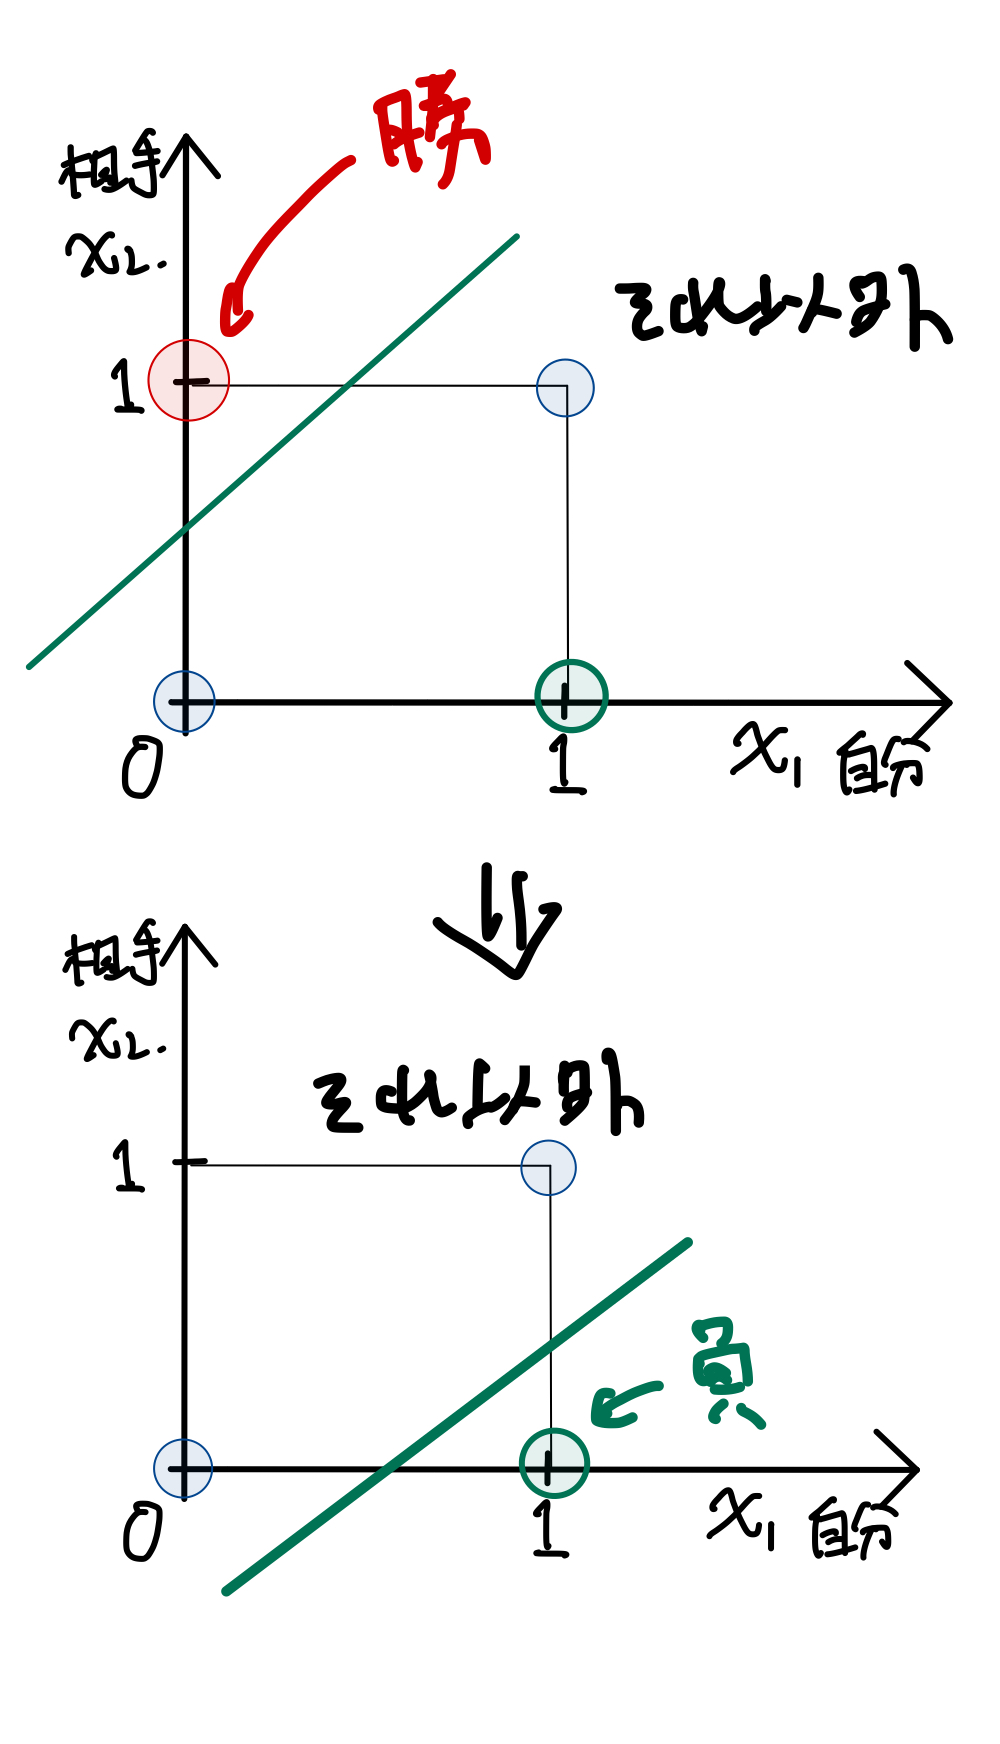

In [13]:
# 訓練データと正解ラベル
import numpy as np
# 訓練データ
train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# 正解ラベル
label = np.array([[0, 0], [1, 0], [0, 1], [0, 0]]) #(アイコ，勝ち，負け，アイコ)

# TenforFlowのインポート
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
model = Sequential() # Sequentialオブジェクトの生成

# 隠れ層
model.add(
    Dense(input_dim=2, # 入力する1データあたりの値の形状
          units=2,     # ユニット数は2個
          activation='sigmoid')) # 活性化関数はシグモイド

# 出力層
model.add(
    Dense(units=2,               # ユニット数は2個
          activation='sigmoid')) # 活性化関数はシグモイド

model.compile(
    optimizer=SGD(learning_rate=0.5),  # lrをlearning_rateに変更
    loss='binary_crossentropy') # クロスエントロピー誤差関数はバイナリ専用
    #loss='categorical_crossentropy')

history = model.fit(
    train,        # 訓練データ
    label,        # 正解ラベル
    epochs=300,  # 学習回数
    batch_size=4, # ミニバッチの数(4つすべてのデータを使って1回の学習を終える)
    verbose=0)    # 学習の進捗状況の出力なし

# モデルの保存
# model.save('model.h5')

# 学習済みのMLPの出力
pred = model.predict(train, batch_size=4)
# MLPの出力が0.5以上であれば1、そうでなければ0を返す
print((pred >= 0.5).astype(int))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0 0]
 [1 0]
 [0 1]
 [0 0]]


# [演習] ジャンケンルールを機械学習で
「グー」→0，「チョキ」→1，「パー」→2として

[0, 0]→あいこ(自分も相手も0点), [1, 0]→勝ち(自分が1点，相手が0点), [0, 1]→負け(自分が0点，相手が1点),

とした時のモデルを作ってみよう。\
クロスエントロピー関数は`binary_crossentropy`ではなく，3クラス分類に適した交差エントロピーである`categorical_crossentropy`を使ってください。

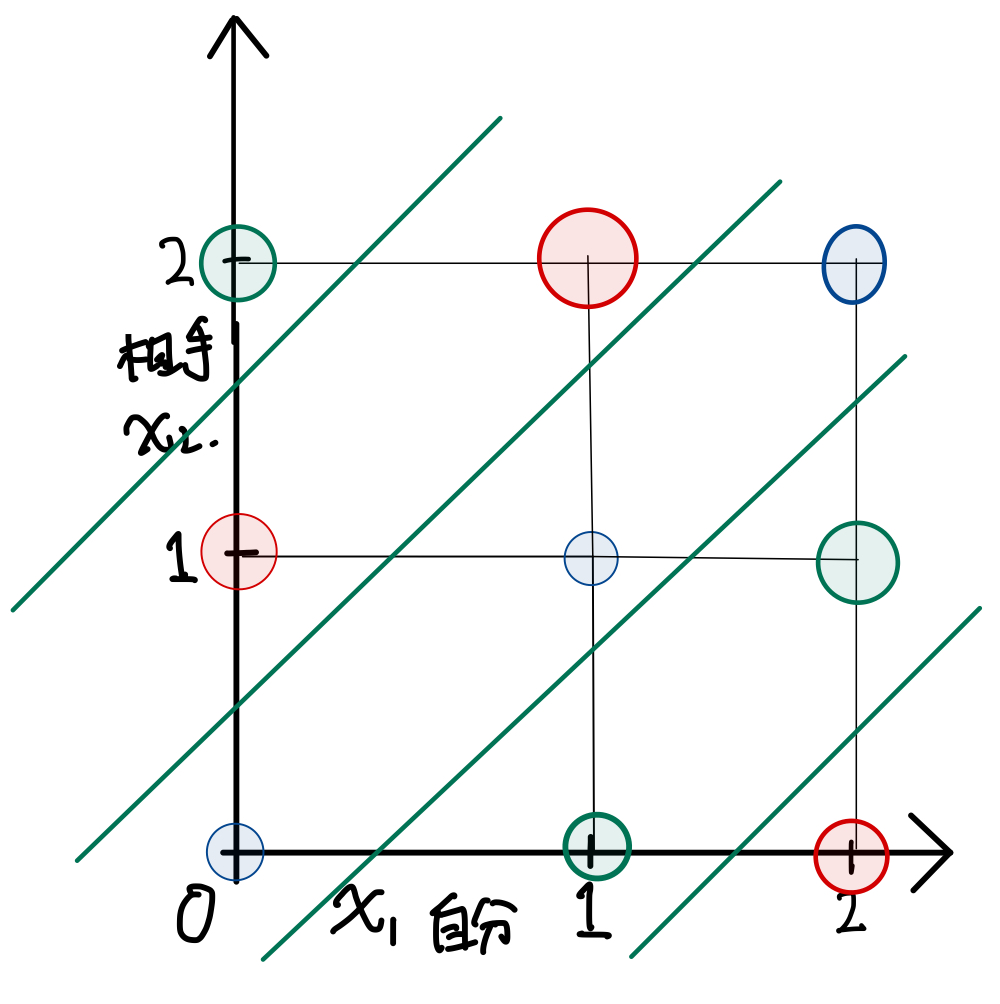